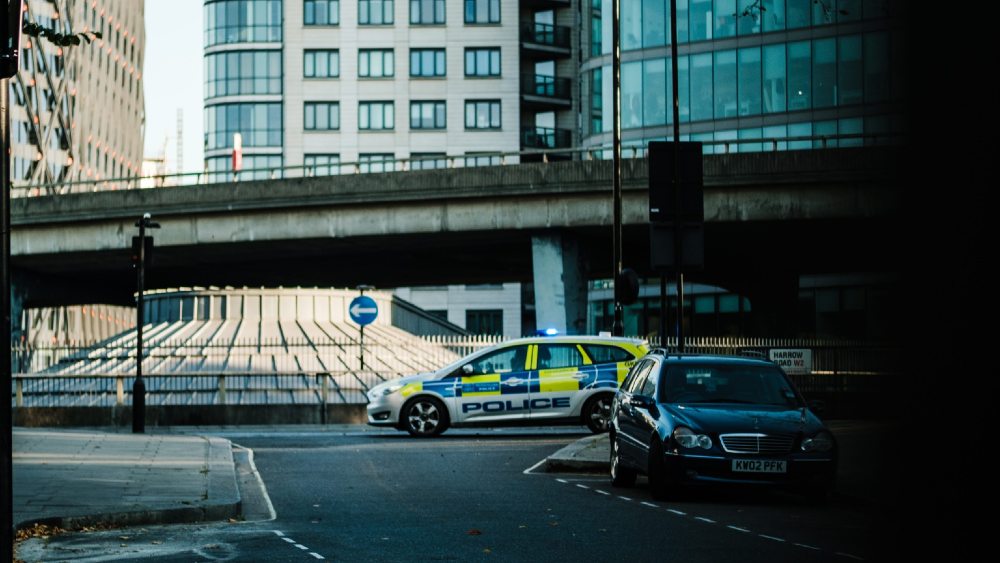

# Crime Stats in the UK
#### October 2018 - October 2019

In this note book I want to have a look at the crimes stats here in the UK for the past year. I am using the data provided by https://data.police.uk/, the data is under [Open Government Licence v3.0](https://www.nationalarchives.gov.uk/doc/open-government-licence/version/3/) license. This is just a personal project to better my data science skills and I hope you can find some interesting conclusions here.

## Work Flow

I am going to use the following work flow:
    1. Download the data from the link below and import it using Pandas.
    2. Inspect the data to see what information is available.
    3. Wrange, clean and prepare the data.
    4. Analyze the data.
    5. Try to model and predict the data.
    6. Visualize, report, and present the findings.
    
Download link: [https://data.police.uk/data/](https://data.police.uk/data/)
Useful links to explain the columns and get the different crime types, [https://data.police.uk/about/](https://data.police.uk/about/), [https://www.police.uk/about-this-site/faqs/#what-do-the-crime-categories-mean](https://www.police.uk/about-this-site/faqs/#what-do-the-crime-categories-mean).

The cover picture was taken by Nikolay Dimitrov (@ncipio) from Unsplash.

In [40]:
import pandas as pd
import os
import matplotlib.pyplot as plt
%matplotlib inline

In [125]:
df = None
months = []

folder_list = os.listdir('data')
for folder in folder_list:
    months.append(folder)
    for file in os.listdir('data/' + folder):        
        df_temp = pd.read_csv('data/' + folder + '/' + file)
        df_temp['folder'] = folder
        df_temp['file'] = file
        
        if df is None:
            df = df_temp
        else:
            df = pd.concat([df, df_temp], sort=False, ignore_index=True)
        
    index += 1

    if index > 1:
        break
print(months)

['2019-03']


In [31]:
df.head()

,Crime ID,Month,Reported by,Falls within,Longitude,Latitude,Location,LSOA code,LSOA name,Outcome type,folder,file,Crime type,Last outcome category,Context
0,a1a5a8d0b1e24d7f8ee52b806c7605c50c8fe839f142a8...,2019-03,West Mercia Police,West Mercia Police,NaN,NaN,No location,NaN,NaN,Unable to prosecute suspect,2019-03,2019-03-west-mercia-outcomes.csv,NaN,NaN,NaN
1,07f0fe80ff0cfb2c9c701e4b2d799cb03ebc25bca82356...,2019-03,West Mercia Police,West Mercia Police,NaN,NaN,No location,NaN,NaN,Unable to prosecute suspect,2019-03,2019-03-west-mercia-outcomes.csv,NaN,NaN,NaN
2,843e533914dd107c15506ffc847f646d61b47c543a9999...,2019-03,West Mercia Police,West Mercia Police,NaN,NaN,No location,NaN,NaN,Investigation complete; no suspect identified,2019-03,2019-03-west-mercia-outcomes.csv,NaN,NaN,NaN
3,891b76792b62c4aa3292184bafb752caf3e7ef2e958f5c...,2019-03,West Mercia Police,West Mercia Police,NaN,NaN,No location,NaN,NaN,Unable to prosecute suspect,2019-03,2019-03-west-mercia-outcomes.csv,NaN,NaN,NaN
4,a542cc68dbd9a5a0d9a2030435565e91835770cf73a25a...,2019-03,West Mercia Police,West Mercia Police,NaN,NaN,No location,NaN,NaN,Unable to prosecute suspect,2019-03,2019-03-west-mercia-outcomes.csv,NaN,NaN,NaN


In [32]:
df = df.dropna(subset=['Latitude', 'Longitude'])

https://data.police.uk/about/

https://www.police.uk/about-this-site/faqs/#what-do-the-crime-categories-mean

In [33]:
df['Crime type'].unique()

array([nan, 'Violence and sexual offences', 'Burglary',
       'Criminal damage and arson', 'Other theft', 'Robbery',
       'Public order', 'Shoplifting', 'Vehicle crime', 'Drugs',
       'Possession of weapons', 'Anti-social behaviour', 'Bicycle theft',
       'Theft from the person', 'Other crime'], dtype=object)

In [37]:
df.groupby(['folder'])['folder'].nunique()

folder
2019-03    1
2019-04    1
Name: folder, dtype: int64

In [36]:
len(df.index)

1848681

In [91]:
# # df_crimes_per_month = df.groupby(['folder', 'Crime type'])['Crime type'].count()
# df_crimes_pm = pd.DataFrame({'count' : df.groupby(['folder', 'Crime type']).value_counts()}).reset_index()
# # df_crimes_pm = df[['folder', 'Crime type']].groupby(['folder', 'Crime type']).counts()
# type(df_crimes_pm)

# # df_crimes_pm = df_crimes_pm.loc[df_crimes_pm['folder'] == '2019-03']
# # df_crimes_pm

In [138]:
df_crimes_pm = df.groupby(['folder','Crime type']).size().reset_index()
df_crimes_pm.rename(columns={'Crime type': 'crime_type', 0:'count'}, inplace=True)
df_crimes_pm = df_crimes_pm.loc[df_crimes_pm['folder'] == '2019-03']

df.groupby(['folder','Outcome type']).size().reset_index()

,folder,Outcome type,0
0,2019-03,Action to be taken by another organisation,4983
1,2019-03,Court case unable to proceed,1631
2,2019-03,Defendant found not guilty,2811
3,2019-03,Defendant sent to Crown Court,335
4,2019-03,Formal action is not in the public interest,3760
5,2019-03,Further investigation is not in the public int...,5714
6,2019-03,Investigation complete; no suspect identified,178709
7,2019-03,Local resolution,9888
8,2019-03,Offender deprived of property,187
9,2019-03,Offender fined,2417


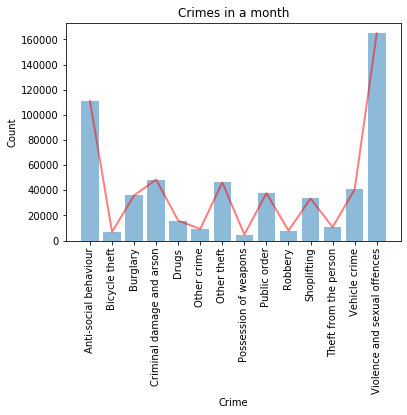

In [136]:
plt.bar(df_crimes_pm.crime_type, df_crimes_pm['count'], align='center', alpha=0.5)
plt.plot(df_crimes_pm.crime_type, df_crimes_pm['count'], lw=2, c='r', alpha=0.5)
plt.xticks(rotation=90)
plt.ylabel('Count')
plt.xlabel('Crime')
plt.title('Crimes in a month')

plt.show()